#Sentiment Analysis and Topic Modelling of Social Media Posts to understand People's Perspective.

##Theme : Agnipathscheme

##Data Extraction

Installing snscrape to extract tweets from Twitter

In [ ]:
pip install snscrape

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 59 kB 3.6 MB/s 


In [ ]:
import snscrape.modules.twitter as sntwitter
import pandas as pd

Input our query "Agnipathscheme" to extract 50k tweets using snscape

In [ ]:
query = "AgnipathScheme"
tweets=[]
for tweet in sntwitter.TwitterSearchScraper(query).get_items():
  if len(tweets)==100:
    break
  else:
    tweets.append(tweet.content)
print(len(tweets))

100


In [ ]:
import pandas as pd
df = pd.DataFrame(tweets, columns=['Tweets'])
df.head()

,Tweets
0,@SinghNavdeep @yajnasc @palepurshankar @gunner...
1,#Agniveer #AgnipathScheme just asking will the...
2,Retired Gen. Vishwambhar Dayal along with many...
3,आगरा के एकलव्य स्टेडियम में 15 जनवरी को होगी स...
4,@rajnathsingh change age criteria in agnipath ...


In [ ]:
df.to_csv('data.csv')

##Data Cleaning

Cleaning of noisy data in the extracted data.

Noisy data :



*   Emojis
*   Hashtags


*   Mentions
*   URL's


*   Punctuations
*   Stopwords

These noisy data are removed by using regex in python







In [ ]:
import re
def remove_emojis(tweets):
    l=[]
    h=[]
    emoj = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642" 
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                      "]+", re.UNICODE)
    
    for i in tweets:
      m=re.sub(r'http\S+', '',i) #remove links
      k=re.sub(r'@\S+' , '',m) #remove mentions
      n=re.sub(r'#\S+' , '',k) #remove hashtags
      z=re.sub(r'\n\d','',n) #remove delimeters
      l.append(re.sub(emoj, '', z)) #remove emojis
    return l

To remove Punctuations and Stopwords use the nltk in NLP

In [ ]:
import nltk
nltk.download("punkt")
nltk.download("wordnet")
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


printing all the extracted tweets

In [ ]:
for i in tweets:
  print(i)

@SinghNavdeep @yajnasc @palepurshankar @gunners_shot1 @ColVenkat @ChandrusWeb @manaman_chhina Militaries all over the world have short commissions and enlistment periods to save on pensions. I really don't understand the opposition to Agnipath scheme.
#Agniveer #AgnipathScheme just asking will the loyalty be the same without much compensation??

Are the seniors and present solider happy with all these . While #India could treat soldiers royally for 70years ,but it couldn't in the last 8 years shows the failure
Retired Gen. Vishwambhar Dayal along with many Army Veterans joined Bharat Jodo Yatra &amp; walked with Rahul Gandhi

later he interacted with the veterans and discussed about
1.Agnipath Scheme 
2.Threats from China
3.Implementation of OROP
4.Separate Ahir regiment in the Indian Army https://t.co/QZVYKfCWwV
आगरा के एकलव्य स्टेडियम में 15 जनवरी को होगी सामान्य प्रवेश परीक्षा, 3440 युवा होंगे शामिल
#Agniveer #AgnipathScheme #UttarPradesh #IndianArmy 

https://t.co/rCPJ1F5hHl
@rajna

Text after removing noisy data

In [ ]:
clean_text=remove_emojis(tweets)
for i in clean_text:
  print(i)

       Militaries all over the world have short commissions and enlistment periods to save on pensions. I really don't understand the opposition to Agnipath scheme.
  just asking will the loyalty be the same without much compensation??

Are the seniors and present solider happy with all these . While  could treat soldiers royally for 70years ,but it couldn't in the last 8 years shows the failure
Retired Gen. Vishwambhar Dayal along with many Army Veterans joined Bharat Jodo Yatra &amp; walked with Rahul Gandhi

later he interacted with the veterans and discussed about.Agnipath Scheme .Threats from China.Implementation of OROP.Separate Ahir regiment in the Indian Army 
आगरा के एकलव्य स्टेडियम में 15 जनवरी को होगी सामान्य प्रवेश परीक्षा, 3440 युवा होंगे शामिल
    


 change age criteria in agnipath scheme for technical and clerk trades
Effects of  will be long term.... if it  is such a good scheme , why is not being applied for all  jobs including    etc ??  
If  is so wonderful , why is

Removing punctuations and stopwords in noisy text

In [ ]:
def remove_punctuation(sentence):
  for i in sentence:
    if i in string.punctuation:
      sentence = sentence.replace(i, "")
  return sentence
def remove_stopwords(sentence):
  stop_words = set(stopwords.words('english'))
  word_tokens = word_tokenize(example_sent)
  filtered_sentence = []
  for w in word_tokens:
    if w not in stop_words:
      filtered_sentence.append(w)
  return filtered_sentence
filter_text=[]
for i in clean_text:
  example_sent = remove_punctuation(i)
  example_sent = " ".join(remove_stopwords(example_sent))
  print(example_sent)
  filter_text.append(example_sent)

Militaries world short commissions enlistment periods save pensions I really dont understand opposition Agnipath scheme
asking loyalty without much compensation Are seniors present solider happy While could treat soldiers royally 70years couldnt last 8 years shows failure
Retired Gen Vishwambhar Dayal along many Army Veterans joined Bharat Jodo Yatra amp walked Rahul Gandhi later interacted veterans discussed aboutAgnipath Scheme Threats ChinaImplementation OROPSeparate Ahir regiment Indian Army
आगरा के एकलव्य स्टेडियम में 15 जनवरी को होगी सामान्य प्रवेश परीक्षा 3440 युवा होंगे शामिल
change age criteria agnipath scheme technical clerk trades
Effects long term good scheme applied jobs including etc
If wonderful implemented jobs including
Do children Just remembered Chutki bhaar sindur ki kimat tum kya jano remembered long long time country suffers another 1962
RG interacted exservicemen opposed Agnipath scheme amp said current OROP benefit junior army officers The veterans wanted straig

##Sentiment Analysis

Installing transformers to build a model to do sentiment analysis

In [ ]:
pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.8 MB 6.5 MB/s 
     |████████████████████████████████| 182 kB 37.8 MB/s 
     |████████████████████████████████| 7.6 MB 45.3 MB/s 


The resultant tweets contain all the retweets. Removing all the retweets

In [ ]:
set_text=set(filter_text)
final_text=[]
for i in set_text:
  if len(i)==0:
    pass
  else:
    final_text.append(i)

Installing VADERSENTIMENT model for sentiment analysis

In [ ]:
pip install vaderSentiment

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 125 kB 6.2 MB/s 


In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
positive=[]
negative=[]
neutral=[]
sid_obj = SentimentIntensityAnalyzer()
def sentiment_scores(sentence):
  sentiment_dict = sid_obj.polarity_scores(sentence)
  if sentiment_dict['compound'] >= 0.05 :
    positive.append(sentence)
  elif sentiment_dict['compound'] <= - 0.05 :
    negative.append(sentence)
  else :
    neutral.append(sentence)
for i in final_text:	
  sentence = i
  sentiment_scores(sentence)

In [ ]:
len_pos=len(positive)
len_neg=len(negative)
len_neut=len(neutral)

Percentages of all the labeled classes

In [ ]:
pos_perc=(len_pos/(len_pos+len_neg+len_neut))*100
neg_perc=(len_neg/(len_pos+len_neg+len_neut))*100
neut_perc=(len_neut/(len_pos+len_neg+len_neut))*100
print("Positive Percentage : ",pos_perc)
print("Negative Percentage : ",neg_perc)
print("Neutral Percentage : ",neut_perc)

Positive Percentage :  35.13513513513514
Negative Percentage :  29.72972972972973
Neutral Percentage :  35.13513513513514


In [ ]:
pip install matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Plotting the number of postive negative and neutral tweets

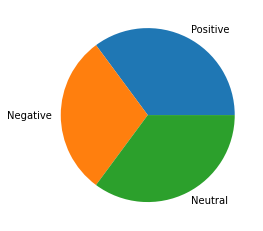

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
y = [len_pos,len_neg,len_neut]
mylabels = ["Positive","Negative","Neutral"]
plt.pie(y,labels=mylabels)
plt.show() 

Plotting the percentages of positive negative and neutral tweets

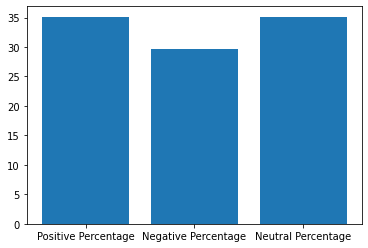

In [ ]:
x = np.array(["Positive Percentage","Negative Percentage","Neutral Percentage"])
y = [pos_perc,neg_perc,neut_perc]
plt.bar(x,y)
plt.show()

##Summarization

Installation of SPACY libarary to do summarization

In [ ]:
pip install spacy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
from string import punctuation
punctuation = punctuation + '\n'
from heapq import nlargest

/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


In [ ]:
stopwords = list(STOP_WORDS)
nlp = spacy.load('en_core_web_sm')

In [ ]:
def summ(text):
  doc = nlp(text)
  tokens = [token.text for token in doc]
  word_frequencies = {}
  for word in doc:
    if word.text.lower() not in stopwords:
        if word.text.lower() not in punctuation:
            if word.text not in word_frequencies.keys():
                word_frequencies[word.text] = 1
            else:
                word_frequencies[word.text] += 1
  max_frequency = max(word_frequencies.values())
  for word in word_frequencies.keys():
    word_frequencies[word] = word_frequencies[word]/max_frequency
  sentence_tokens = [sent for sent in doc.sents]
  sentence_scores = {}
  for sent in sentence_tokens:
    for word in sent:
        if word.text.lower() in word_frequencies.keys():
            if sent not in sentence_scores.keys():
                sentence_scores[sent] = word_frequencies[word.text.lower()]
            else:
                sentence_scores[sent] += word_frequencies[word.text.lower()]
  select_length = int(len(sentence_tokens)*0.1)
  summary = nlargest(select_length, sentence_scores, key = sentence_scores.get)
  final_summary = [word.text for word in summary]
  summary = ' '.join(final_summary)
  return summary

In [ ]:
len(positive)

26

In [ ]:
len(negative)


22

In [ ]:
len(neutral)

26

In [ ]:
n=len(positive)//2
poe=[]
for i in range(n):
  poe.append(positive[i])
lo="".join(poe)
k=summ(lo)

In [ ]:
poe=[]
for i in range(n+1,len(positive)):
  poe.append(positive[i])
lo="".join(poe)
p=summ(lo)

Summary of POSITIVE tweets

In [ ]:
print(k+p)

Summary of NEGATIVE tweets

In [ ]:
lo="".join(negative)
j=summ(lo)
print(j)

country wait watch1PM Our endeavour increase impact governance reduce interference govtNirav Modi loses bid take extradition fight UK SCDelhi HC reserves verdict batch pleas challenging Centres Agnipath scheme recruitment armed forcesAnd sena built n developed destructed schemeAgnipath scheme band krde pehlefir ahir regiment ki demand krnatab logic legegabcDuring matter challenging advocate today argued Modi govts decision abruptly cancel previous recruitment process unfair defence aspirants Delhi High Court reserved judgementAgneepath Scheme Controversy Update Agnipath Scheme ProtestReally painful Unfortunately get prepared The Central Agnipath Scheme made vaccine compulsary


In [ ]:
n=len(neutral)//2
poe=[]
for i in range(n):
  poe.append(neutral[i])
lo="".join(poe)
u=summ(lo)

In [ ]:
poe=[]
for i in range(n+1,len(neutral)):
  poe.append(neutral[i])
lo="".join(poe)
v=summ(lo)

Summary of NEUTRAL tweets

In [ ]:
print(u+v)

What Indias scheme mean Nepals military labour migration exploreYear Ender 2022 अग्निपथ योजना ने सुलगाया पूरा देश नहीं झुकी फिर भी सरकारMoral story Majority doesnt mean political Next rollbackदिल्ली हाईकोर्ट ने अग्निवीर और नियमित सिपाहियों के अलगअलग वेतनमान पर केंद्र से जवाब मांगाعدالت نے وکلاء سے کہاहर युवा का एक ही नाराकब होगा पेपर हमारा Army examAir force enrollment ये दिल मांगे वर्दीकेवल के लिए हो क्यों के लिए क्यों नही बात कुछ गडबड लग रही है। ऊपर वाले के घर देर है अंधेर गेट पर चौकीदार बनाएंगे जब 4 साल के tenure के बाद उन्हें सेना से फेंक दिया जाएगा। धन्य हो प्रभु जोर से बोलो


##WordCloud

In [ ]:
import pandas as pd
df1 = pd.DataFrame(final_text, columns=['Tweet'])
df1.head()

,Tweet
0,asking loyalty without much compensation Are s...
1,Militaries world short commissions enlistment ...
2,What Indias scheme mean Nepals military labour...
3,Why become angry When atheist Ham log desh tum...
4,congress Congress demoralising armed forces Op...


In [ ]:
df1.to_csv('tweets.csv')

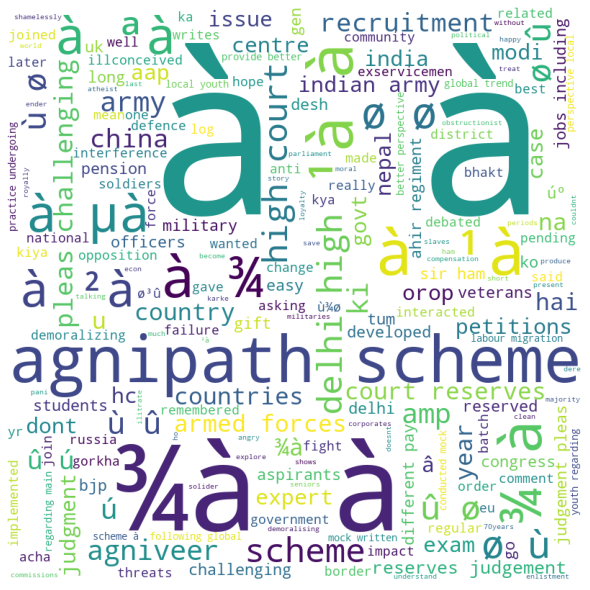

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd
df = pd.read_csv(r"tweets.csv", encoding ="latin-1")
comment_words = ''
stopwords = set(STOPWORDS)
for val in df.Tweet:
	val = str(val)
	tokens = val.split()
	for i in range(len(tokens)):
		tokens[i] = tokens[i].lower()
	
	comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 800, height = 800,
				background_color ='white',
				stopwords = stopwords,
				min_font_size = 10).generate(comment_words)					
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

##Topic Modelling

Installing BERTTOPIC model to do Topic Modelling

In [ ]:
pip install bertopic

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 90 kB 4.5 MB/s 
     |████████████████████████████████| 662 kB 18.6 MB/s 
     |████████████████████████████████| 88 kB 6.2 MB/s 
     |████████████████████████████████| 5.2 MB 45.4 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 85 kB 1.7 MB/s 
     |████████████████████████████████| 1.3 MB 15.7 MB/s 
     |████████████████████████████████| 1.1 MB 38.0 MB/s 
  Created wheel for hdbscan: filename=hdbscan-0.8.29-cp38-cp38-linux_x86_64.whl size=2700862 sha256=71a29ade1e5a6b2ffb4a341eaa20f68a9da0434e8861457bcc00f67f573b1bac
  Stored in directory: /root/.cache/pip/wheels/76/06/48/527e038689c581cc9e519c73840efdc7473805149e55bd7ffd
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=1

In [ ]:
from bertopic import BERTopic
import json
import pandas as pd

In [ ]:
topic_model = BERTopic(embedding_model="all-MiniLM-L6-v2")

In [ ]:
topics, probs = topic_model.fit_transform(final_text)


Downloading:   0%|          | 0.00/1.18k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/10.6k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/612 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/116 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/39.3k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/350 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/13.2k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/349 [00:00<?, ?B/s]

In [ ]:
topic_model.get_topic_info()


,Topic,Count,Name
0,0,61,0_scheme_agnipath_delhi_high
1,1,13,1_अग_नह_hai_पर


In [ ]:
topic_model.get_topic(topic=0)


[('scheme', 0.13189327228914047),
 ('agnipath', 0.11014375016840655),
 ('delhi', 0.052040356513706955),
 ('high', 0.04591770654834713),
 ('army', 0.04591770654834713),
 ('court', 0.0449358516632331),
 ('reserves', 0.039426494136980704),
 ('challenging', 0.039426494136980704),
 ('the', 0.03248048229963964),
 ('amp', 0.03248048229963964)]

In [ ]:
topic_model.get_topic(3)


False

In [ ]:
topic_model.get_representative_docs(1)


['अग्निवीरों को मिलेगा यात्रा भत्ता जानिए क्या है शर्त',
 'दिल्ली हाईकोर्ट ने अग्निवीर और नियमित सिपाहियों के अलगअलग वेतनमान पर केंद्र से जवाब मांगा',
 'केवल के लिए हो क्यों के लिए क्यों नही बात कुछ गडबड लग रही है। ऊपर वाले के घर देर है अंधेर नही। जय हिंद।']

Intertopic Distance Map

In [ ]:
topic_model.visualize_topics()

ValueError: ignored

Topic Word Scores

In [ ]:
topic_model.visualize_barchart()


Similarity Matrix

In [ ]:
topic_model.visualize_heatmap()


Hierchial Clutering Dendograms

In [ ]:
topic_model.visualize_hierarchy()


In [ ]:
pip install textblob

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from textblob import TextBlob
pol=[]
sun=[]
for i in tweets:
  res = TextBlob(i)
  k=res.sentiment
  sun.append(round(k[1],2))
  p=res.sentiment.polarity
  pol.append(round(p,2))

In [ ]:
data=pd.read_csv("data.csv")
data.head()

,Unnamed: 0,Tweets
0,0,@SinghNavdeep @yajnasc @palepurshankar @gunner...
1,1,#Agniveer #AgnipathScheme just asking will the...
2,2,Retired Gen. Vishwambhar Dayal along with many...
3,3,आगरा के एकलव्य स्टेडियम में 15 जनवरी को होगी स...
4,4,@rajnathsingh change age criteria in agnipath ...


In [ ]:
data['Polarity']=pol
data['Subjectivity']=sun


In [ ]:
data.head(14)

,Unnamed: 0,Tweets,Polarity,Subjectivity
0,0,@SinghNavdeep @yajnasc @palepurshankar @gunner...,0.10,0.25
1,1,#Agniveer #AgnipathScheme just asking will the...,0.11,0.28
2,2,Retired Gen. Vishwambhar Dayal along with many...,0.25,0.25
3,3,आगरा के एकलव्य स्टेडियम में 15 जनवरी को होगी स...,0.00,0.00
4,4,@rajnathsingh change age criteria in agnipath ...,0.00,0.10
5,5,Effects of #AgnipathScheme will be long term.....,0.22,0.50
6,6,"If #AgnipathScheme is so wonderful , why is it...",1.00,1.00
7,7,Do any of the #Judges have a children in #Ind...,-0.23,0.50
8,8,"RG interacted with ex-servicemen, who opposed ...",0.07,0.29
9,9,👌👌🤣🤣🤣 Atleast someone will salute Sepoys also....,0.00,1.00


In [ ]:
data.shape

(100, 4)

In [ ]:
from sklearn.cluster import KMeans
from sklearn import preprocessing
import sklearn.cluster as cluster
import sklearn.metrics as metrics
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [ ]:
data.corr()

,Unnamed: 0,Polarity,Subjectivity
Unnamed: 0,1.000000,0.145542,0.104947
Polarity,0.145542,1.000000,0.327471
Subjectivity,0.104947,0.327471,1.000000


In [ ]:
scaler = MinMaxScaler()
scale = scaler.fit_transform(data[['Polarity','Subjectivity']])
df_scale = pd.DataFrame(scale, columns = ['Polarity','Subjectivity']);
df_scale.head(5),

(   Polarity  Subjectivity
 0  0.528796          0.25
 1  0.534031          0.28
 2  0.607330          0.25
 3  0.476440          0.00
 4  0.476440          0.10,)

In [ ]:
K=range(1,20)
wss = []
for k in K:
    kmeans=cluster.KMeans(n_clusters=k)
    kmeans=kmeans.fit(df_scale)
    wss_iter = kmeans.inertia_
    wss.append(wss_iter)

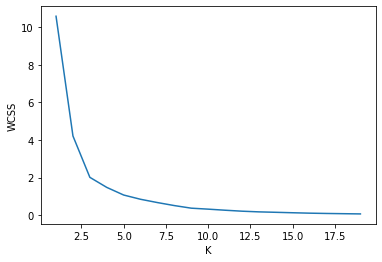

In [ ]:
plt.xlabel('K')
plt.ylabel('WCSS')
plt.plot(K,wss)

In [ ]:
km=KMeans(n_clusters=3)
y_predicted = km.fit_predict(df_scale[['Polarity','Subjectivity']])
y_predicted

array([2, 2, 2, 1, 1, 2, 0, 2, 2, 0, 0, 0, 2, 0, 1, 2, 0, 1, 2, 2, 1, 2,
       1, 0, 1, 1, 2, 2, 2, 2, 2, 2, 1, 1, 2, 0, 1, 1, 2, 1, 2, 1, 1, 2,
       1, 2, 0, 0, 1, 1, 1, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2,
       1, 2, 1, 1, 1, 1, 1, 1, 2, 0, 2, 0, 2, 0, 2, 2, 2, 0, 0, 2, 2, 0,
       2, 1, 2, 2, 0, 2, 0, 1, 2, 2, 0, 0], dtype=int32)

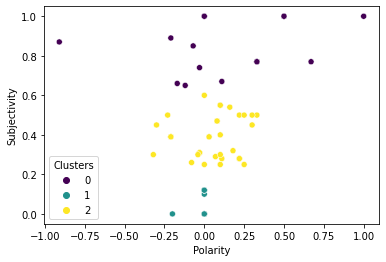

In [ ]:
data['Clusters'] = km.labels_
sns.scatterplot(x="Polarity", y="Subjectivity",hue = 'Clusters',  data=data,palette='viridis')

In [ ]:
data.head(10)

,Unnamed: 0,Tweets,Polarity,Subjectivity,Clusters
0,0,@SinghNavdeep @yajnasc @palepurshankar @gunner...,0.10,0.25,2
1,1,#Agniveer #AgnipathScheme just asking will the...,0.11,0.28,2
2,2,Retired Gen. Vishwambhar Dayal along with many...,0.25,0.25,2
3,3,आगरा के एकलव्य स्टेडियम में 15 जनवरी को होगी स...,0.00,0.00,1
4,4,@rajnathsingh change age criteria in agnipath ...,0.00,0.10,1
5,5,Effects of #AgnipathScheme will be long term.....,0.22,0.50,2
6,6,"If #AgnipathScheme is so wonderful , why is it...",1.00,1.00,0
7,7,Do any of the #Judges have a children in #Ind...,-0.23,0.50,2
8,8,"RG interacted with ex-servicemen, who opposed ...",0.07,0.29,2
9,9,👌👌🤣🤣🤣 Atleast someone will salute Sepoys also....,0.00,1.00,0


In [ ]:
data['Clusters'].value_counts()

2    47
1    33
0    20
Name: Clusters, dtype: int64

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
del data['Tweets']
X=data.drop('Clusters',axis=1).values
y = data['Clusters'].values

In [ ]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=45)

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

In [ ]:

model = SVC()
model.fit(X_train, y_train)

SVC()

In [ ]:
X_test = scaler.transform(X_test)
y_pred = model.predict(X_test)

In [ ]:
model.score(X_train, y_train)

0.9625

In [ ]:
model.score(X_test, y_test)

0.95

In [ ]:
confusion_matrix(y_test, y_pred)

array([[ 3,  0,  1],
       [ 0,  6,  0],
       [ 0,  0, 10]])

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.75      0.86         4
           1       1.00      1.00      1.00         6
           2       0.91      1.00      0.95        10

    accuracy                           0.95        20
   macro avg       0.97      0.92      0.94        20
weighted avg       0.95      0.95      0.95        20



##Conclusion : 

We extracted 50k tweets from the twitter using the snscrape library in python. After data cleaning nearly 36k are useful tweets remaining tweets are noisy tweets. After Sentiment analyis the Number of Postive tweets are : 10k, Number of Negative tweets are : 6K and Number of Neutral tweets are : 19k. We summarized all the respective classes tweets by using spacy library in Python and atlast build a Topic Modelling on the clean text to get the abstract "topics" that occur in a collection of documents